In [1]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session =tf.compat.v1.InteractiveSession(config=config)

In [3]:
# gpu_devices = tf.config.experimental.list_physical_devices("GPU")
# for device in gpu_devices:
#     tf.config.experimental.set_memory_growth(device, True)

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 2)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [5]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D, Bidirectional
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import backend as K
from keras.layers import Flatten, Activation, RepeatVector, Permute, Multiply, Lambda, Dense, merge

In [7]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
#from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [8]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()


In [9]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [10]:
# mat1=scipy.io.loadmat('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_sEMG_preprocess_data.mat')
# nina_raw_train=mat1['Training_process_data']
# # # nina_raw_valid=mat1['Valid_raw_data']
# nina_raw_test=mat1['Testing_process_data'] 
# print('raw_Train_data',nina_raw_train)
# # # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [11]:
# np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv", nina_raw_train, delimiter=",")
# np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv", nina_raw_test, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [12]:
file_path_Train= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv"
file_path_Test= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv"
# file_path_Valid= "/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv"
# file_path_Train= "./nina_pro_Train_E123.csv"
# file_path_Test= "./nina_pro_Test_E123.csv"
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
#plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program
LABELS=[]
for i in range(1,53,1):
  LABELS.append (i)
print(LABELS)
# LABELS = ['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12','13',\
# '14','15','16','17','18','19','20','21','22','23','24','25','26','27','28',\
# '29','30','31','32','33','34','35','36','37','38','39','40','41','42','43',\
# '44','45','46','47','48','49','50','51','52']
#LABELS = np.asarray(LABELS)

keras version  2.3.0-tf
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [13]:
# The number of steps within one time segment
TIME_PERIODS = 20
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 10
n_features = 10

In [14]:
def read_data_Train(file_path_Train):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Train = pd.read_csv(file_path_Train,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [15]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [16]:
def read_data_Test(file_path_Test):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Test = pd.read_csv(file_path_Test,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [17]:
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [18]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [19]:
df_Train = read_data_Train('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv')
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(20)

Number of columns in the dataframe: 11
Number of rows in the dataframe: 5031936



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


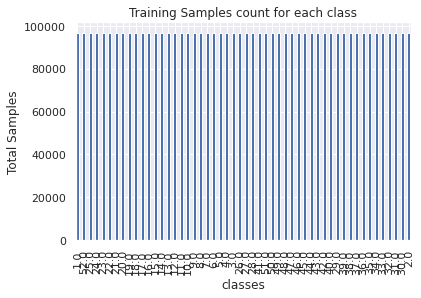

In [20]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
#plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [21]:
df_Test = read_data_Test('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv')
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(20)


Number of columns in the dataframe: 11
Number of rows in the dataframe: 2156544



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


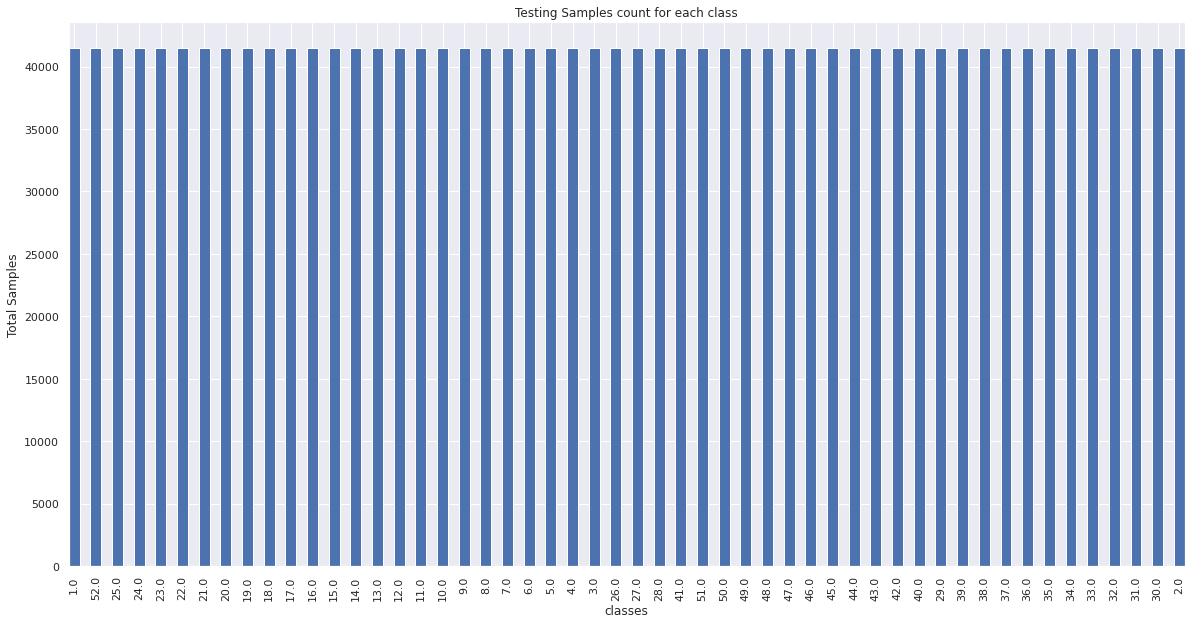

In [22]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [23]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.00720,0.00242,0.00493,0.00242,0.00245,0.00241,0.00308,0.01634,0.00241,0.00247,1.00000
1,0.00836,0.00243,0.00478,0.00242,0.00245,0.00241,0.00312,0.01699,0.00241,0.00247,1.00000
2,0.00949,0.00243,0.00464,0.00242,0.00246,0.00241,0.00317,0.01762,0.00241,0.00248,1.00000
3,0.01052,0.00243,0.00451,0.00242,0.00246,0.00241,0.00322,0.01822,0.00242,0.00248,1.00000
4,0.01142,0.00243,0.00439,0.00242,0.00246,0.00241,0.00327,0.01877,0.00242,0.00248,1.00000


In [24]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:n_features])

In [25]:
df_Train.iloc[:,0:n_features]=scaler.transform(df_Train.iloc[:,0:n_features])

In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,-0.67229,-0.63485,-0.51161,-0.43213,-0.36882,-0.45281,-0.75398,-0.90170,-0.51352,-0.77192,1.00000
1,-0.66990,-0.63485,-0.51198,-0.43213,-0.36879,-0.45280,-0.75392,-0.90043,-0.51352,-0.77191,1.00000
2,-0.66759,-0.63485,-0.51234,-0.43212,-0.36875,-0.45280,-0.75384,-0.89918,-0.51352,-0.77190,1.00000
3,-0.66546,-0.63484,-0.51268,-0.43212,-0.36871,-0.45280,-0.75376,-0.89799,-0.51352,-0.77189,1.00000
4,-0.66362,-0.63483,-0.51299,-0.43211,-0.36867,-0.45279,-0.75369,-0.89691,-0.51351,-0.77188,1.00000


In [27]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.03176,0.00247,0.00244,0.00240,0.00244,0.00240,0.00258,0.03562,0.00244,0.00241,1.00000
1,0.03205,0.00248,0.00244,0.00240,0.00245,0.00240,0.00258,0.03567,0.00244,0.00241,1.00000
2,0.03234,0.00248,0.00245,0.00240,0.00246,0.00240,0.00259,0.03569,0.00244,0.00241,1.00000
3,0.03261,0.00249,0.00246,0.00240,0.00246,0.00240,0.00260,0.03570,0.00244,0.00241,1.00000
4,0.03285,0.00249,0.00246,0.00240,0.00246,0.00240,0.00261,0.03566,0.00245,0.00241,1.00000


In [28]:
df_Test.iloc[:,0:n_features]=scaler.transform(df_Test.iloc[:,0:n_features])

In [29]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,-0.62181,-0.63470,-0.51795,-0.43219,-0.36893,-0.45286,-0.75480,-0.86372,-0.51346,-0.77206,1.00000
1,-0.62121,-0.63469,-0.51792,-0.43219,-0.36881,-0.45286,-0.75479,-0.86364,-0.51345,-0.77206,1.00000
2,-0.62061,-0.63468,-0.51790,-0.43219,-0.36872,-0.45286,-0.75477,-0.86358,-0.51345,-0.77206,1.00000
3,-0.62006,-0.63467,-0.51789,-0.43219,-0.36867,-0.45286,-0.75476,-0.86357,-0.51344,-0.77205,1.00000
4,-0.61957,-0.63465,-0.51789,-0.43219,-0.36865,-0.45286,-0.75474,-0.86364,-0.51344,-0.77205,1.00000


In [30]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size               C1       C2       C3       C4       C5       C6       C7  \
0       -0.67229 -0.63485 -0.51161 -0.43213 -0.36882 -0.45281 -0.75398   
1       -0.66990 -0.63485 -0.51198 -0.43213 -0.36879 -0.45280 -0.75392   
2       -0.66759 -0.63485 -0.51234 -0.43212 -0.36875 -0.45280 -0.75384   
3       -0.66546 -0.63484 -0.51268 -0.43212 -0.36871 -0.45280 -0.75376   
4       -0.66362 -0.63483 -0.51299 -0.43211 -0.36867 -0.45279 -0.75369   
...          ...      ...      ...      ...      ...      ...      ...   
5031931 -0.67906 -0.63424 -0.51714 -0.43021 -0.35403  0.13654  0.12757   
5031932 -0.67903 -0.63426 -0.51716 -0.43025 -0.35431  0.13208  0.11671   
5031933 -0.67898 -0.63427 -0.51718 -0.43028 -0.35465  0.12755  0.10702   
5031934 -0.67894 -0.63427 -0.51719 -0.43031 -0.35495  0.12339  0.09885   
5031935 -0.67890 -0.63428 -0.51720 -0.43032 -0.35514  0.11980  0.09225   

              C8       C9      C10  Class_label  ActivityEncoded  
0       -0.90170 -0.51352 -0.7

In [31]:
def create_segments_and_labels(df, time_steps,step, label_name):
    # x, y, z acceleration as features
    # N_FEATURES = 10
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
	#step = 200
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        c1s = df['C1'].values[i: i + time_steps]
        c2s = df['C2'].values[i: i + time_steps]
        c3s = df['C3'].values[i: i + time_steps]
        c4s = df['C4'].values[i: i + time_steps]
        c5s = df['C5'].values[i: i + time_steps]
        c6s = df['C6'].values[i: i + time_steps]
        c7s = df['C7'].values[i: i + time_steps]
        c8s = df['C8'].values[i: i + time_steps]
        c9s = df['C9'].values[i: i + time_steps]
        c10s = df['C10'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
      #  label_name - label_name.astype(int)
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s,c10s])
        # segments = pd.concat([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s, c10s], axis=1)
        labels.append(label)
    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [32]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (503192, 20, 10)
503192 training samples
y_train shape:  (503192,)
20
10
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]
x_train shape: (20, 10)
input_shape: (20, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (503192, 52)


In [33]:
x_test, y_test = create_segments_and_labels(df_Test,
                                            TIME_PERIODS,
                                            STEP_DISTANCE,
                                            LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (215653, 20, 10)
215653 testing samples
y_test shape:  (215653,)


In [34]:
n_steps, n_length = 20, 10
n_depth=1
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (503192, 20, 10, 1)
x_test shape:  (215653, 20, 10, 1)
n_outputs 52


In [35]:
verbose, epochs, batch_size = 0, 500, 4

In [38]:
def generate_model():
  inputs = keras.Input(shape=(n_steps,n_length,n_depth))
  x = Conv2D(filters=64, kernel_size=(7,1), padding='same', kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04))(inputs)
  x = MaxPooling2D(pool_size=(8,1),strides=(2,1))(x)
  x = Activation('tanh')(x)
  x = Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04))(x)
  x = Activation('tanh')(x)
  x = Dropout(0.2093)(x)
  x = Activation('relu')(x)
  x = Flatten()(x)
  x = Dense(512, activation='tanh')(x)
  x = BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None)(x)
  outputs = Dense(n_outputs, activation='softmax')(x)
  CNN_olsson_model = keras.Model(inputs, outputs)
  CNN_olsson_model.summary()
  return CNN_olsson_model

In [39]:
# 23 model summary 
if __name__ == "__main__":
    model = generate_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20, 10, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 10, 64)         0         
_________________________________________________________________
activation (Activation)      (None, 2, 10, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 10, 64)         20544     
_________________________________________________________________
activation_1 (Activation)    (None, 1, 10, 64)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 10, 64)         0     

In [40]:
adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = '/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN20X10/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
# model.build(inputs)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20, 10, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 10, 64)         0         
_________________________________________________________________
activation (Activation)      (None, 2, 10, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 10, 64)         20544     
_________________________________________________________________
activation_1 (Activation)    (None, 1, 10, 64)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 10, 64)         0     

In [41]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [42]:
csv_logger = CSVLogger('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN20X10/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/500
125794/125798 [============================>.] - ETA: 0s - loss: 3.7939 - accuracy: 0.0814
Epoch 00001: val_accuracy improved from -inf to 0.13227, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN20X10/checkpoint.hdf5
125798/125798 [==============================] - 888s 7ms/step - loss: 3.7939 - accuracy: 0.0814 - val_loss: 3.5011 - val_accuracy: 0.1323
Epoch 2/500
125798/125798 [==============================] - ETA: 0s - loss: 3.5520 - accuracy: 0.1269
Epoch 00002: val_accuracy improved from 0.13227 to 0.15910, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN20X10/checkpoint.hdf5
125798/125798 [==============================] - 867s 7ms/step - loss: 3.5520 - accuracy: 0.1269 - val_loss: 3.3397 - val_accuracy: 0.1591
Epoch 3/500
125796/125798 [============================>.] - ETA: 0s - loss: 3.4286 - accuracy: 0.1555
Epoch 00003: val_accuracy improved from 0.15910 to 0.18818, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_D

125796/125798 [============================>.] - ETA: 0s - loss: 2.8482 - accuracy: 0.3109
Epoch 00047: val_accuracy did not improve from 0.33302
125798/125798 [==============================] - 680s 5ms/step - loss: 2.8482 - accuracy: 0.3109 - val_loss: 2.7851 - val_accuracy: 0.3326
Epoch 48/500
125790/125798 [============================>.] - ETA: 0s - loss: 2.8482 - accuracy: 0.3112
Epoch 00048: val_accuracy did not improve from 0.33302
125798/125798 [==============================] - 681s 5ms/step - loss: 2.8482 - accuracy: 0.3112 - val_loss: 2.9748 - val_accuracy: 0.3327
Epoch 49/500
125794/125798 [============================>.] - ETA: 0s - loss: 2.8446 - accuracy: 0.3114
Epoch 00049: val_accuracy did not improve from 0.33302
125798/125798 [==============================] - 681s 5ms/step - loss: 2.8446 - accuracy: 0.3114 - val_loss: 2.9361 - val_accuracy: 0.3316
Epoch 50/500
125787/125798 [============================>.] - ETA: 0s - loss: 2.8451 - accuracy: 0.3124
Epoch 00050: va

Epoch 99/500
125795/125798 [============================>.] - ETA: 0s - loss: 2.7906 - accuracy: 0.3260
Epoch 00099: val_accuracy did not improve from 0.34810
125798/125798 [==============================] - 705s 6ms/step - loss: 2.7907 - accuracy: 0.3260 - val_loss: 2.7579 - val_accuracy: 0.3479
Epoch 100/500
125791/125798 [============================>.] - ETA: 0s - loss: 2.7902 - accuracy: 0.3258
Epoch 00100: val_accuracy did not improve from 0.34810
125798/125798 [==============================] - 697s 6ms/step - loss: 2.7903 - accuracy: 0.3258 - val_loss: 3.2371 - val_accuracy: 0.3438
Epoch 101/500
125786/125798 [============================>.] - ETA: 0s - loss: 2.7877 - accuracy: 0.3261
Epoch 00101: val_accuracy did not improve from 0.34810
125798/125798 [==============================] - 696s 6ms/step - loss: 2.7877 - accuracy: 0.3261 - val_loss: 3.0378 - val_accuracy: 0.3451
Epoch 102/500
125789/125798 [============================>.] - ETA: 0s - loss: 2.7888 - accuracy: 0.3264

In [ ]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index])

In [ ]:
model.save('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/CNN20X10/CNN_LSTM_nina_5X97')

In [ ]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

In [ ]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

In [ ]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))